In [27]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
file_path = '/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_1/2k_my_teams_analysis/player_data_final.csv'

myteam_player_data = pd.read_csv(file_path)

In [3]:
myteam_player_data

,Unnamed: 0,Player_Name,team,School,Theme_Type,Postion,Weight,Height,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
0,0,Dwyane Wade,Miami Heat,Marquette,Rewards,SG/PG,220lbs (99kg),"6'4"" (193cm)",99,37,99,99,99,99,90,99,99,85,99,99,99,99,99,99,95,95,95,99,99,90,99,99,99,90,99,99,97,95,99,99,97,99,99,85,99,99,95,99
1,1,Anthony Davis,New Orleans Pelicans,Kentucky,Rewards,F/﻿C,253lbs (114kg),"6'10"" (208cm)",99,26,96,90,90,99,99,99,99,80,88,84,86,90,90,90,99,99,99,99,99,99,99,99,99,99,99,99,97,99,90,99,95,90,99,97,99,99,96,99
2,2,'85 Julius Erving,Philadelphia 76ers,Massachusetts,Rewards,SF/SG,200lbs (90kg),"6'6"" (198cm)",99,35,95,95,95,98,87,98,95,95,85,85,87,84,82,92,77,74,78,90,97,80,98,95,85,75,83,95,89,74,95,93,94,93,93,90,92,80,90,88
3,3,'05 Grant Hill,Detroit Pistons,Duke,Rewards,SF,225lbs (102kg),"6'8"" (203cm)",99,33,94,95,95,97,80,97,95,92,88,86,86,89,88,89,79,78,80,90,98,80,98,95,78,70,89,98,86,70,94,95,95,95,95,79,91,78,80,95
4,4,'86 Dominique Wilkins,Atlanta Hawks,Georgia,Rewards,SF/SG,200lbs (90kg),"6'7"" (200cm)",99,26,95,96,96,98,85,96,85,95,83,83,86,84,78,85,77,75,78,93,98,98,98,97,76,78,92,98,86,70,86,91,88,92,92,92,89,75,93,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1186,Chris Chiozza,Houston Rockets,lorida,'20 NBA,G,175lbs (79kg),"6'0"" (182cm)",68,24,71,70,73,65,39,77,76,80,69,67,75,76,59,69,40,36,41,50,67,25,27,37,27,32,27,75,63,28,65,62,65,68,62,65,57,27,66,42
1187,1187,Michael Frazier,Houston Rockets,lorida,'20 NBA,SG,200lbs (90kg),"6'4"" (193cm)",68,25,72,71,73,75,47,79,74,83,59,62,69,63,45,63,40,35,42,59,67,30,65,40,25,28,33,67,54,33,50,49,57,63,52,55,52,33,59,30
1188,1188,Thomas Welsh,Denver Nuggets,UCLA,'20 NBA,﻿C,255lbs (115kg),"7'0"" (213cm)",68,23,56,43,41,65,58,75,65,80,40,26,35,47,39,50,65,65,65,57,47,65,50,43,57,50,54,70,55,55,25,61,49,26,45,65,45,63,66,35
1189,1189,Duncan Robinson,Miami Heat,Michigan,'20 NBA,SF/PF,210lbs (95kg),"6'8"" (203cm)",68,25,58,55,59,68,31,76,71,80,52,52,65,62,31,62,42,27,48,49,68,26,66,37,31,36,40,76,51,46,48,46,54,61,46,60,39,34,62,26


In [6]:
myteam_player_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [45]:
teams =df.groupby('Theme_Type')

In [56]:
df = myteam_player_data[myteam_player_data.Speed != 0]

In [57]:
df['Speed'].describe()

count    1166.000000
mean       72.210978
std        20.004508
min        25.000000
25%        63.000000
50%        74.000000
75%        82.000000
max       380.000000
Name: Speed, dtype: float64

In [58]:
df.describe()

,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.00000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,82.546312,27.656947,75.723842,72.210978,70.639794,75.524014,62.641509,88.081475,82.390223,92.978559,62.831046,65.121784,68.683533,66.900515,57.829331,72.909949,60.432247,56.716123,68.216123,71.681818,81.773585,58.054031,65.419383,74.435678,68.684391,53.425386,59.918525,83.62693,71.114923,61.202401,67.384220,80.439108,76.540309,68.849057,69.104631,77.976844,57.030875,57.852487,76.909091,65.758148
std,8.370857,5.400904,9.771074,20.004508,23.979403,17.878772,17.519386,19.608032,11.230838,127.351787,16.902236,34.851330,23.524770,30.566896,54.148889,43.639368,17.751024,55.002731,61.916665,10.736603,42.241288,49.459704,19.125156,82.372923,110.152138,39.465082,21.138279,16.65558,9.899434,31.568064,38.474426,90.339071,34.505179,15.626088,14.296289,54.900647,19.076914,67.613053,29.440977,19.645349
min,68.000000,16.000000,43.000000,25.000000,25.000000,25.000000,25.000000,58.000000,32.000000,50.000000,28.000000,25.000000,25.000000,25.000000,25.000000,25.000000,29.000000,25.000000,30.000000,45.000000,32.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,31.00000,47.000000,25.000000,25.000000,36.000000,41.000000,25.000000,31.000000,43.000000,25.000000,25.000000,42.000000,25.000000
25%,75.000000,24.000000,68.000000,63.000000,60.000000,67.000000,50.000000,80.000000,75.000000,80.000000,50.000000,48.000000,58.000000,55.000000,36.000000,60.000000,45.000000,34.000000,50.000000,63.250000,70.000000,30.000000,55.000000,54.000000,40.000000,32.000000,46.250000,76.00000,63.000000,45.000000,53.000000,65.000000,68.000000,60.000000,58.000000,64.000000,39.000000,41.250000,67.000000,49.000000
50%,82.000000,27.000000,77.000000,74.000000,74.000000,76.000000,62.000000,89.000000,84.000000,80.000000,64.000000,68.000000,72.000000,69.000000,55.000000,72.000000,56.000000,45.000000,61.000000,71.000000,77.000000,50.000000,67.500000,69.000000,57.500000,50.000000,58.000000,84.00000,71.000000,60.000000,68.000000,74.500000,74.000000,72.000000,70.000000,74.000000,57.000000,52.000000,75.000000,70.000000
75%,89.000000,31.000000,83.000000,82.000000,82.000000,84.000000,75.000000,95.000000,92.750000,85.000000,76.000000,79.000000,83.000000,78.000000,70.000000,81.000000,75.000000,72.000000,79.000000,80.000000,85.750000,75.000000,80.000000,84.000000,74.000000,69.000000,73.000000,95.00000,79.000000,72.000000,79.000000,83.000000,82.000000,80.000000,80.000000,82.000000,73.000000,68.000000,84.000000,80.000000
max,99.000000,76.000000,99.000000,380.000000,474.000000,381.000000,99.000000,695.000000,99.000000,2085.000000,99.000000,576.000000,480.000000,471.000000,1355.000000,1072.000000,99.000000,1080.000000,1082.000000,99.000000,891.000000,590.000000,99.000000,1379.000000,2166.000000,1055.000000,485.000000,494.00000,97.000000,464.000000,1055.000000,2374.000000,880.000000,99.000000,99.000000,1096.000000,99.000000,2052.000000,596.000000,99.000000


In [101]:
duke_player_cards.query("Speed > 99")

,Player_Name,team,School,Theme_Type,Postion,Weight,Height,Overall,Age,Athleticism,Speed,Acceleration,Vertical,Strength,Stamina,Hustle,Overall_durability,Playmaking,Speed_with_ball,Ball_handle,Passing_accuracy,Passing_vision,Passing_IQ,Rebounding,Offensive_rebound,Defensive_rebound,Inside_scoring,Driving_layup,Standing_dunk,Driving_dunk,Draw_foul,Post_moves,Post_hook,Post_fade,Hands,Defending,Interior_defense,Shot_mid,Perimeter_defense,Help_defense_IQ,Pick_and_roll_defense_IQ,Lateral_quickness,Pass_perception,Reaction_time,Steal,Block,Shot_contest
437,R.J. Barrett,New York Knicks,Duke,Moments of the Week 1,SF/SG,210lbs (95kg),"6'7"" (200cm)",86.0,19.0,81.0,184.0,85.0,82.0,54.0,695.0,80.0,80.0,74.0,182.0,81.0,75.0,366.0,74.0,62.0,349.0,1068.0,70.0,285.0,345.0,85.0,368.0,459.0,52.0,55.0,85.0,75.0,58.0,84.0,84.0,69.0,85.0,84.0,75.0,85.0,52.0,75.0,80.0
477,Wendell Carter Jr.,Chicago Bulls,Duke,Moments of the Week 2,﻿C/PF,255lbs (115kg),"6'10"" (208cm)",85.0,20.0,76.0,168.0,55.0,68.0,84.0,95.0,85.0,1080.0,50.0,47.0,50.0,56.0,41.0,70.0,89.0,289.0,289.0,83.0,274.0,80.0,61.0,84.0,485.0,584.0,85.0,75.0,78.0,284.0,347.0,83.0,566.0,50.0,84.0,85.0,38.0,82.0,488.0,85.0
723,Zion Williamson,New Orleans Pelicans,Duke,'20 NBA,F,285lbs (129kg),"6'7"" (200cm)",79.0,19.0,78.0,177.0,77.0,90.0,74.0,81.0,76.0,1480.0,59.0,65.0,64.0,56.0,56.0,60.0,62.0,266.0,660.0,64.0,476.0,86.0,82.0,861.0,1461.0,1055.0,50.0,76.0,68.0,464.0,1055.0,1067.0,71.0,67.0,61.0,80.0,61.0,67.0,80.0,51.0


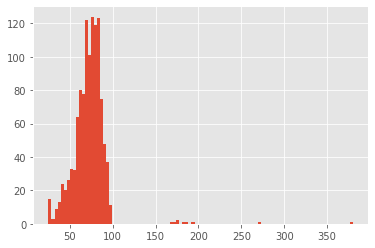

In [60]:
df['Speed'].hist(bins =100)

In [61]:
colleges = df.groupby('School')

In [62]:
colleges['Player_Name'].count()

School
Alabama               7
Arizona              27
Arizona State         8
Arkansas              7
Auburn                1
                     ..
ayetteville State     1
esno State            4
lorida               17
lorida Gulf Coast     1
lorida State         10
Name: Player_Name, Length: 215, dtype: int64

In [66]:
filter1 = df["School"]=="Duke"
df_school = df.where(filter1)

In [71]:
duke_player_cards = df_school.dropna()

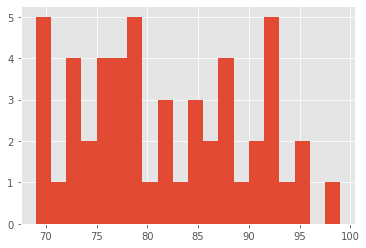

In [99]:
duke_player_cards['Overall'].hist(bins=20)

184.0
168.0
177.0


t - test


